In [2]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import DataLoader
from datasets.clock import ClockConfig, ClockDataset
import matplotlib.pyplot as plt
import os
from config import MODELS_DIR
import typing
from torch import nn
from vis import load_model_and_data, print_model_parameters, get_outputs, show_data, visualize_reconstruction, visualize_predictions, visualize_latent

LATENT_DIM = 1
IMG_SIZE = 128
BATCH_SIZE = 64

data_config = ClockConfig(
    minute_hand_len=1,
    minute_hand_start=0.5,
    miute_hand_thickness=0.1,
    hour_hand_len=0.5,
    hour_hand_start=0,
    hour_hand_thickness=0.1
)

model, dataloader = load_model_and_data(
    img_size=IMG_SIZE,
    data_config=data_config,
    latent_dim=LATENT_DIM,
    name='ConvMLPEncoder',
    postfix='-d18',
)

type_ = 'encoder'

In [17]:
from vis import load_data

dataloader = load_data(
    data_config=data_config,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
)
# show_data(dataloader)

dataset = ClockDataset()
sampler = torch.utils.data.RandomSampler(dataset, replacement=True, num_samples=BATCH_SIZE*16)
dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler,
    num_workers=0,
    pin_memory=True,
)

len([i for i in dataloader])

16

: 

In [4]:
from models.encoders import ConvMLPEncoder
print_model_parameters(ConvMLPEncoder, img_size=IMG_SIZE, latent_dim=LATENT_DIM)

Layer                                       Param Count
------------------------------------------------------------
conv.0.downsample1.0.bias                           128
conv.0.downsample1.0.weight_orig                   1152
conv.0.downsample1.1.weight                         128
conv.0.downsample1.1.bias                           128
conv.0.downsample1.4.bias                           128
conv.0.downsample1.4.weight_orig                 147456
conv.0.downsample1.5.weight                         128
conv.0.downsample1.5.bias                           128
conv.0.downsample2.0.bias                           128
conv.0.downsample2.0.weight_orig                 147456
conv.0.downsample2.1.weight                         128
conv.0.downsample2.1.bias                           128
conv.0.downsample2.4.bias                           128
conv.0.downsample2.4.weight_orig                 147456
conv.0.downsample2.5.weight                         128
conv.0.downsample2.5.bias                  

# Encoder

/mnt/ffs24/home/moham147/experiments/manifold-learning/vis.py:187: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(img, latent)


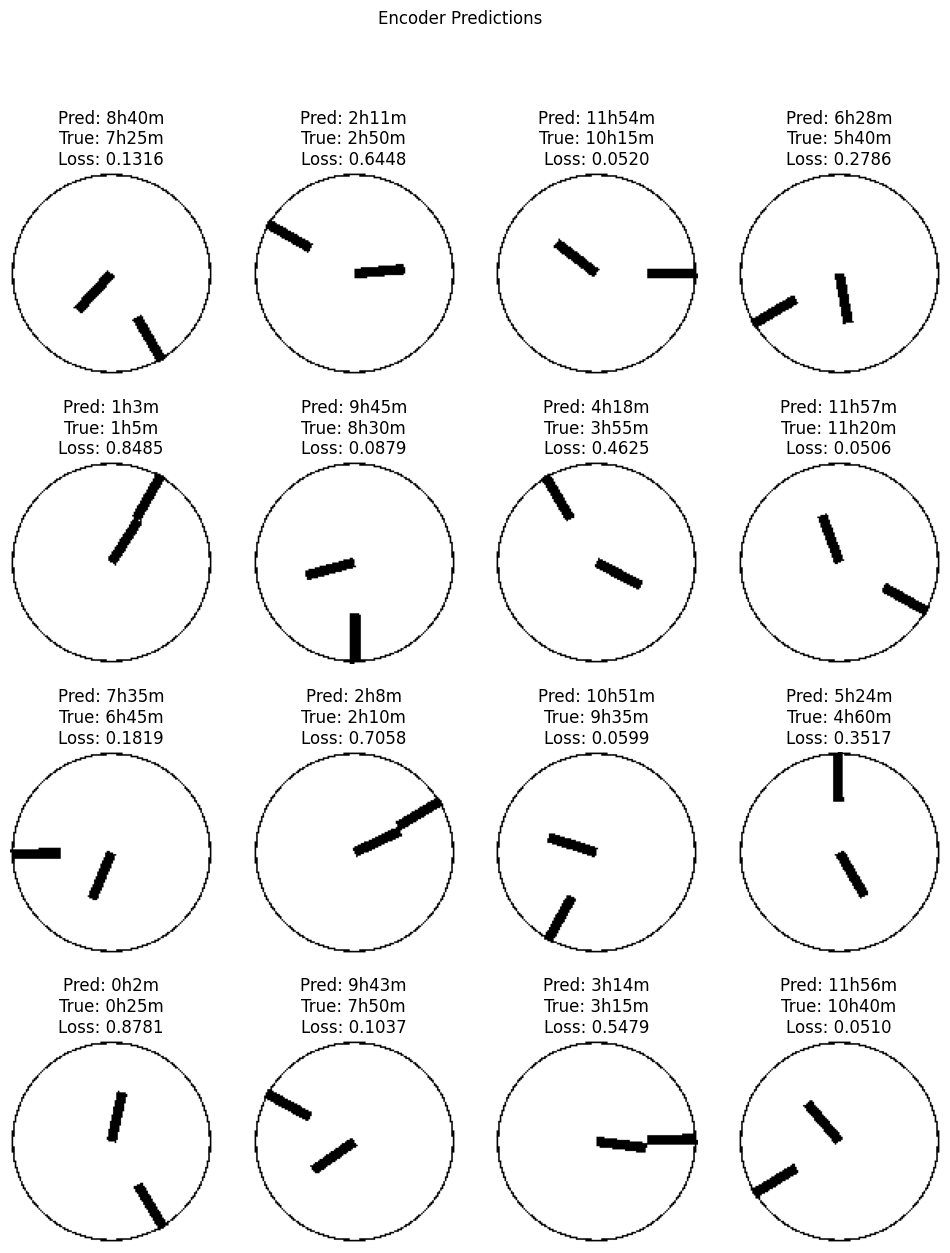

In [5]:
# Visualize the predictions
visualize_predictions(type_, model, dataloader)

# Decoder

# AE

In [6]:
import matplotlib.pyplot as plt
import numpy as np

visualize_reconstruction(type_, model, dataloader)

Encoder


In [ ]:
from sklearn.decomposition import PCA

img, latents, label1d, label2d, reconstructeds = next(get_outputs(type_, model, dataloader))

# Visualize the latent space
# visualize_latent(type_, model, dataloader)
  
  


TypeError: visualize_latent() takes 0 positional arguments but 3 were given

# Encoders

/mnt/ffs24/home/moham147/experiments/manifold-learning/vis.py:187: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(img, latent)


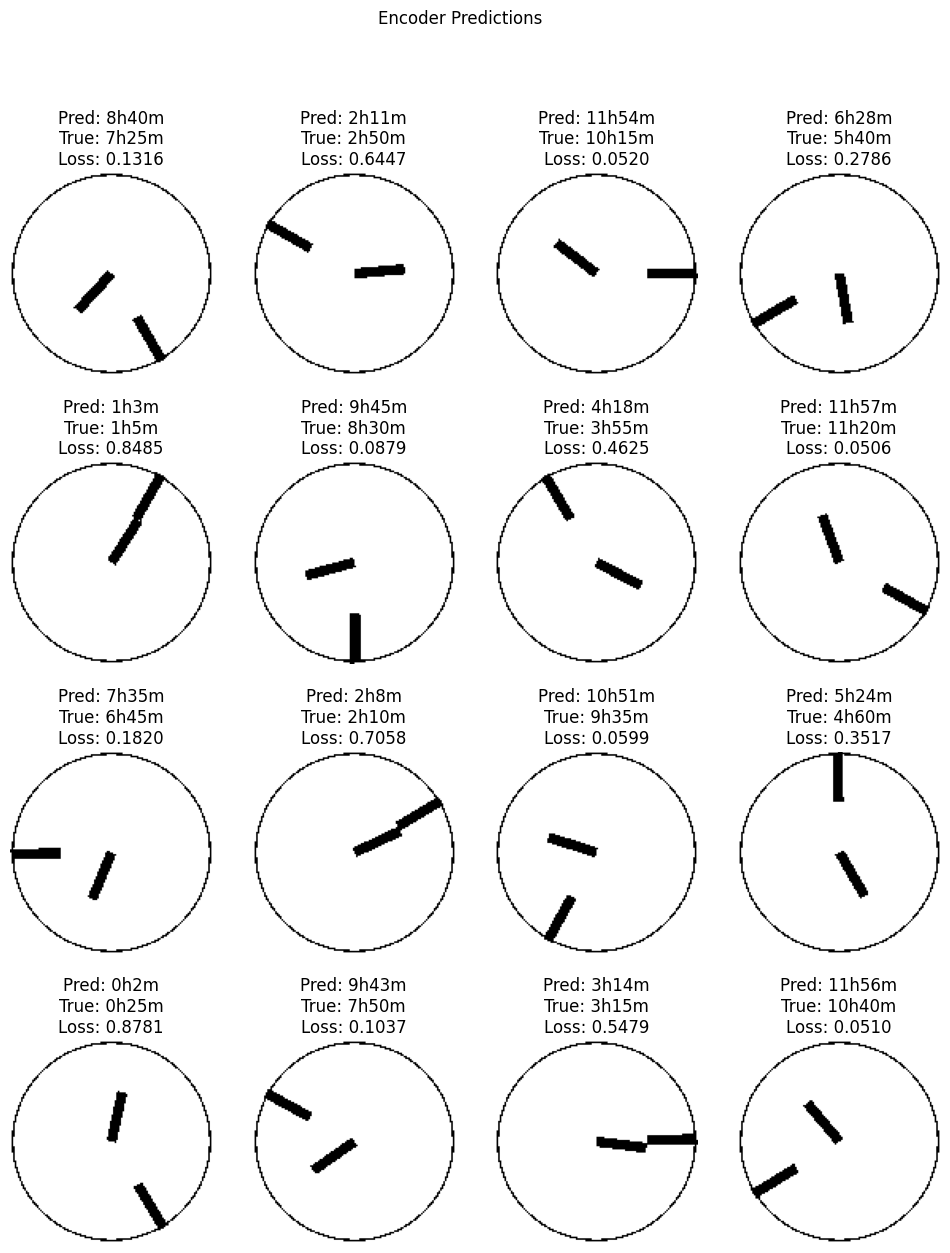

: 

In [12]:
visualize_predictions(type_, model, dataloader)